## Twitter possesses 330 million monthly active users. The platform enables people to intercommunicate directly. Customers are able to express their feelings about products and services. Businesses rely upon this feedback for strategic responses. They are also able to engage customers and the public via tweets.
## Airlines are highly customer-service oriented and customer management is vital. They must quickly detect and address harmful social commentary. 
## Assessing customers’ feelings via Twitter is beneficial but challenging because of the overwhelming amount of tweets. 

## Natural Language Processing NLP is a machine learning application that can be used to perform Sentiment Analysis on customer tweets. Machine learning algorithms will be used to classify tweets into three classes – Negative, Neutral, and Positive.


In [ ]:
# library for computations
import numpy as np
# data manipulation library
import pandas as pd
# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# functionality for preprocessing:
# regular expression functions
import re
# special character processing functions
import unicodedata
# functions to process HTML tags and characters
from bs4 import BeautifulSoup

# natural language processing toolkit library
import nltk
# utility class to facilitate handling of stop words
from nltk.corpus import stopwords 
# stemmatization implementation
from nltk.stem import PorterStemmer 
# tokenization functions
from nltk.tokenize import word_tokenize 
from nltk.tokenize import word_tokenize, sent_tokenize
# lemmatization implementation
from nltk.stem.wordnet import WordNetLemmatizer
# functions to vectorize data
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 5.2 MB/s 
     |████████████████████████████████| 106 kB 38.0 MB/s 


In [ ]:
import contractions

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
datafile_path = '/content/drive/MyDrive/AI&DL/Projects/Tweets.csv'

In [ ]:
# load the data file
twitter_df = pd.read_csv(datafile_path)
data = twitter_df.copy()

In [ ]:
# get a random sample of the data 
data.sample(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
12197,570264740817010689,positive,0.6708,NaN,0.0000,American,NaN,IDontRentPigs,NaN,0,"@AmericanAir @dfwairport Guys, let it go. http...",NaN,2015-02-24 08:51:23 -0800,"Denton County, Texas",Central Time (US & Canada)
8803,567836310775324672,negative,1.0000,Can't Tell,1.0000,Delta,NaN,44riggins44,NaN,0,@JetBlue just lost my business Enjoy your pr...,NaN,2015-02-17 16:01:41 -0800,boston,NaN
12927,569978119530029056,neutral,1.0000,NaN,NaN,American,NaN,soshoreqt,NaN,0,@AmericanAir are pets allowed in first class?,NaN,2015-02-23 13:52:28 -0800,NaN,Eastern Time (US & Canada)
4699,569922915472244736,neutral,1.0000,NaN,NaN,Southwest,NaN,LenaRodGon,NaN,0,@SouthwestAir need assistance getting an exten...,NaN,2015-02-23 10:13:06 -0800,NaN,Central Time (US & Canada)
10631,569103591966793728,negative,1.0000,Cancelled Flight,0.3384,US Airways,NaN,CLChicosky,NaN,0,@USAirways u would think if u were going to Ca...,NaN,2015-02-21 03:57:24 -0800,NaN,NaN


The data indicates that there are missing values in some of the data columns

In [ ]:
twitter_df.shape

(14640, 15)

There are 14,640 records of airline customer tweets and 15 columns of data

In [ ]:
twitter_df.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
neg_ratio = twitter_df.airline_sentiment.value_counts()[0]/twitter_df.shape[0]
nue_ratio = twitter_df.airline_sentiment.value_counts()[1]/twitter_df.shape[0]
pos_ratio = twitter_df.airline_sentiment.value_counts()[2]/twitter_df.shape[0]
print("{:.2f} percent of the total tweets are negative" .format(neg_ratio * 100.0))
print("{:.2f} percent of the total tweets are nuetral" .format(nue_ratio * 100.0))
print("{:.2f} percent of the total tweets are positive" .format(pos_ratio * 100.0))

62.69 percent of the total tweets are negative
21.17 percent of the total tweets are nuetral
16.14 percent of the total tweets are positive


### The vast majority of tweets are from discontent customers
* there is imbalance in our target class
* there are thrice more negative tweets than positive

### Further observations on the data

* The negativereason column appears to have missing values only for corresponding 'positive' and 'nuetral' airline_sentiment values
* If this was input by the airlines, it suggests they are primarily interested in tracking customer dissatisfaction

In [ ]:
twitter_df.name.value_counts()

JetBlueNews       63
kbosspotter       32
_mhertz           29
otisday           28
throthra          27
                  ..
ChrisJLeary        1
tracy_edes         1
NGottesman         1
chadlacalamita     1
sanyabun           1
Name: name, Length: 7701, dtype: int64

In [ ]:
twitter_df[twitter_df.name == 'JetBlueNews']

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
296,568833739192557569,neutral,1.0000,NaN,NaN,Virgin America,NaN,JetBlueNews,NaN,0,@VirginAmerica achieves a second year of profi...,NaN,2015-02-20 10:05:06 -0800,USA,Sydney
7860,569158629443502081,neutral,0.6670,NaN,NaN,Delta,NaN,JetBlueNews,NaN,0,@JetBlue Fliers to Gain Access to WSJ Content ...,NaN,2015-02-21 07:36:06 -0800,USA,Sydney
7867,569150828952444928,neutral,1.0000,NaN,NaN,Delta,NaN,JetBlueNews,NaN,0,@JetBlue Airways Now Covered by Bank of Americ...,NaN,2015-02-21 07:05:06 -0800,USA,Sydney
7872,569143528397254656,neutral,1.0000,NaN,NaN,Delta,NaN,JetBlueNews,NaN,0,@JetBlue Airways Stock Rating Lowered by Vetr ...,NaN,2015-02-21 06:36:06 -0800,USA,Sydney
7884,569113328724807680,neutral,1.0000,NaN,NaN,Delta,NaN,JetBlueNews,NaN,0,@JetBlue's CEO battles to appease passengers a...,NaN,2015-02-21 04:36:05 -0800,USA,Sydney
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8915,567754367860633600,neutral,1.0000,NaN,NaN,Delta,NaN,JetBlueNews,NaN,0,@JetBlue's new CEO seeks the right balance to ...,NaN,2015-02-17 10:36:04 -0800,USA,Sydney
8921,567746576626356225,neutral,1.0000,NaN,NaN,Delta,NaN,JetBlueNews,NaN,0,@JetBlue CEO battles to please Wall St and fly...,NaN,2015-02-17 10:05:06 -0800,USA,Sydney
8954,567724178317402112,positive,0.6429,NaN,NaN,Delta,NaN,JetBlueNews,NaN,0,@JetBlue to offer service from Daytona Beach t...,NaN,2015-02-17 08:36:06 -0800,USA,Sydney
8957,567716378681933825,neutral,1.0000,NaN,NaN,Delta,NaN,JetBlueNews,NaN,0,"@JetBlue CEO weighs profits, flyers - @Chronic...",NaN,2015-02-17 08:05:06 -0800,USA,Sydney


### 7,701 twitter names account for 14,640 tweets
* the highest frequency of tweets appear to be linked to organizations like JetBlue Airways

In [ ]:
twitter_df.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

### Tweets related to six major airlines are compiled in the dataset

## Exploratory Data Analysis EDA

a.  Distribution of all tweets among each airline and sentiment across all the tweets.

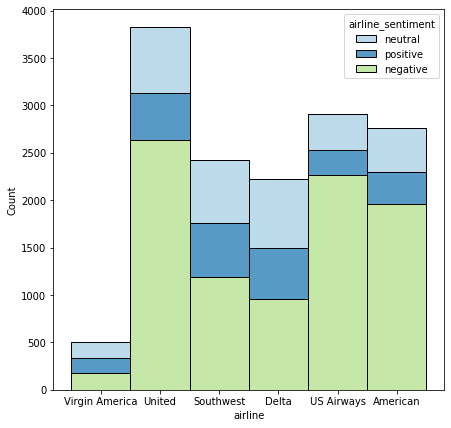

In [ ]:
plt.figure(figsize=(7,7))
sns.histplot(x=twitter_df.airline, hue=twitter_df.airline_sentiment, multiple="stack", palette='Paired')
plt.show()

### The majority of tweets express a negative sentiment
* United Airlines has the highest proportion of tweets in the dataset
* Practically all the airlines haver a higher proportion of nergative tweets to either nuetral or positive
* The percentage of negative tweets among the airlines is somewhat proportional to the total number of tweets, however United, US Airways, and American have a disproportionate number of negative tweets in comparison to the rest. They also have the largest number of tweets.

In [ ]:
twitter_df.negativereason.value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

b. Distribution of Sentiment of tweets for each airline and all the negative reasons.

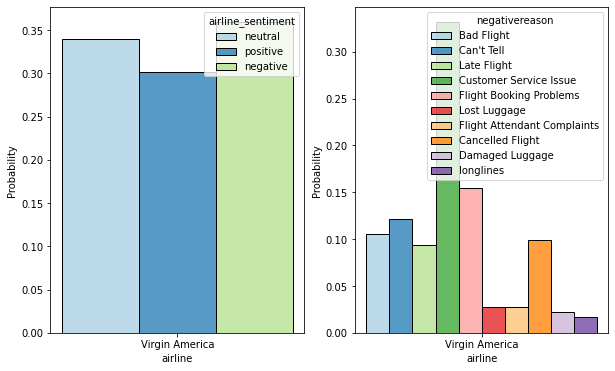

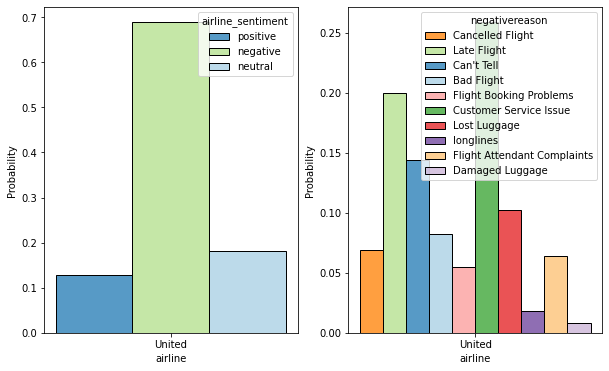

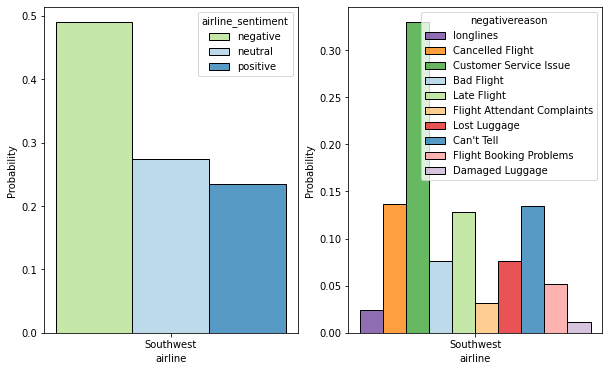

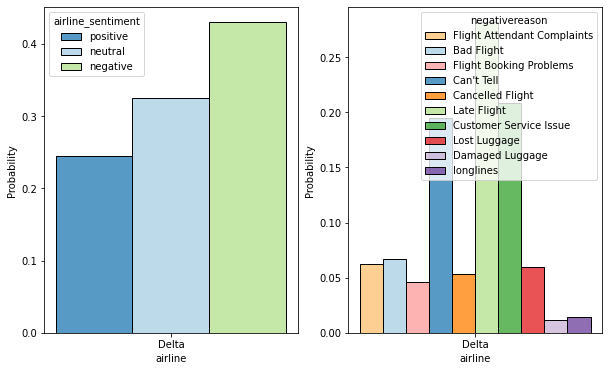

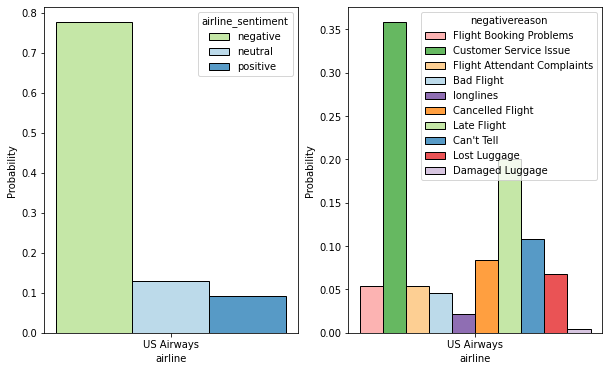

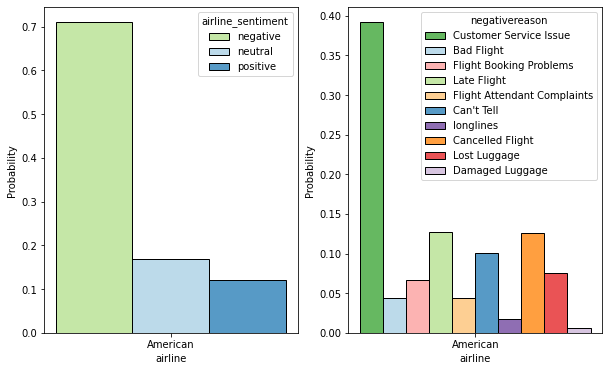

In [ ]:
# select color palettes
palette_colors = sns.color_palette('Paired')
palette_colors2 = sns.color_palette('Paired')
sentiments = twitter_df.airline_sentiment.unique()
# we only have negative reasons where we have negative airline sentiments
# the positive and nuetral airline_sentiments have missing values in the negativereasons column
# so we filter them out
reasons = twitter_df.negativereason[twitter_df.airline_sentiment == 'negative' ].unique()
# we generate a palette dictionary so that our hue and legend colors are consistent
palette_dict = {sentiment: color for sentiment, color in zip(sentiments, palette_colors)}
palette_dict2 = {reason: color for reason, color in zip(reasons, palette_colors2)}

# select each airline
for airline in twitter_df.airline.unique(): 
    fig, axs = plt.subplots(1, 2, figsize=(10, 6))
    # filter them by airline_sentiment
    sns.histplot(x=twitter_df[twitter_df.airline == airline].airline, \
                 hue=twitter_df[twitter_df.airline == airline].airline_sentiment, multiple='dodge', \
                 stat='probability', palette=palette_dict, ax=axs[0])
    
    # filter each airline by the negative reasons ascribed to the tweet
    sns.histplot(x=twitter_df[twitter_df.airline == airline].airline, \
                 hue=twitter_df[twitter_df.airline == airline].negativereason, multiple='dodge', \
                 stat='probability', palette=palette_dict2, ax=axs[1])
    plt.show()


Probabilities have been used on the Y axis that have different ranges therefore the plots of the different airlines are not to be compared without considering the range of the probability values for each airline.

The various airlines have their unique strengths and weaknesses and customer service accounts for the greatest dissatisfaction among flyers followed by late flights

* Delta Airlines is more likely to be late than others
* Virgin America Airline is thrice likely to default on booking than the otherv airlines
* Southwest Airlines and American are leading the pack when it comes to cancellations
* United Airlines appears to be poor in baggage handling and are the most likely to lose customers luggage


### Understanding of Data Columns

In [ ]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

### There are 15 columns in the dataset
* there are four numeric columns
* there are 11 non numeric columns
* 7 of the columns have missing values
* 8 of the columns have no missing values
* the negativereason_confidence count is oddly higher than the corresponding negativereasons' count
* sometimes rather than a NaN value, the negativereason_confidence has a '0.0000' value - this is responsible for the aforementioned discrepancy
* the NaN and '0.0000' values only exist for corresponding 'positive' and 'nuetral' negativereason column values 

### It is possible that the data was pulled from different sources or input by different people

### Understanding of Data Columns
* Drop all other columns except “text” and “airline_sentiment”. 
* b. Check the shape of the data. 
* c. Print the first 5 rows of data.

In [ ]:
# relevent columns 
relevant = ['airline_sentiment', 'text']
# create the list of features to drop
droplist = [feature for feature in twitter_df.columns if feature not in relevant]
# drop the irrelevant features
twitter_df.drop(droplist, axis=1, inplace=True)

In [ ]:
twitter_df.shape

(14640, 2)

In [ ]:
twitter_df.sample(5)

,airline_sentiment,text
14142,negative,@AmericanAir I did 50 times and no one was hel...
9562,negative,@USAirways thx for delayed checkin on noon flt...
308,positive,@VirginAmerica happy to spend the day together...
9616,negative,"@USAirways flt 419. 2+ hrs Late Flight, baggag..."
1130,negative,@united Hopefully my baggage fees will be waiv...


In [ ]:
# a. function that removes HTML tags
def remove_html(text):
    """Remove HTML tags if any"""    
    filtered = BeautifulSoup(text).get_text()
    return filtered

In [ ]:
# b. function that takes a text string and converts it to word tokens
# seperating text from punctuations 
def create_tokens(text):
    """Create tokens from text string"""  
    tokens = word_tokenize(text)
    return tokens

In [ ]:
# c. function that removes numbers
def remove_numbers(text):
    """Remove numbers from text string"""
    return re.sub(r"[0-9]", '', text)

In [ ]:
# d. function that removes special -- non ascii characters
# as well as punctuation
def remove_nonascii_and_puncs(text):
    """Remove non-ASCII characters and punctuation from text"""
    # remove non ascii
    filtered = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    # remove punctuation
    filtered = re.sub(r'[^\w\s]', '', filtered)
    return filtered

In [ ]:
# e. function to remove stopwords
def remove_stop_words(text, retension_list):
    """Remove stopwords words -- the exclude_list is excepted"""
    # get english stopwords from nltk library
    stop_words = stopwords.words('english')
    # remove the excluded set of words from the stopwords to be removed from the text
    less_excluded = list(set(stop_words) - set(retension_list))
    # split text into words tokens and if they are not in the select stopword list
    # append them together with spaces inbetween, and return resulting string
    return ' '.join([word for word in text.split() if word not in less_excluded])                   

In [ ]:
# f. function that converts text to lowercase
def to_lowercase(text):
    """Change text case to lower"""
    return text.lower()

In [ ]:
# g. function to lemmatize text
def lemmatize_word_list(wordlist, skip_list):
    """lemmatize alist of words"""    
    lemmatizer = WordNetLemmatizer()
    new_words = []
    for word in wordlist:
        if (word not in skip_list):
            new_words.append(lemmatizer.lemmatize(word, pos='v'))
        else:
            new_words.append(word)            
    return new_words

In [ ]:
# words that are possibly in the list of stopwords but are typically used to express sentiment
# and therefore should not be removed from the tweet text
exclusion_list = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", "won", "won't", 'wouldn', "wouldn't"]

In [ ]:
# function to expand text with contractions
# it returns the the text that has been processed
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

In [ ]:
# h. function to preprocess the dataset
# using all the implemented preprocessing functions
def process_tweets(text):
    stage = remove_html(text)
    stage = remove_numbers(stage)
    stage = remove_nonascii_and_puncs(stage)
    stage = remove_stop_words(stage, exclusion_list)
    stage = to_lowercase(stage)
    # expand contractions
    stage = replace_contractions(stage)
    # create tokens will convert text string to a list of words
    tokens = create_tokens(stage)
    # lemmatize_word_list will lemmatize a list of word tokens
    final_stage = lemmatize_word_list(tokens, ["united"])
    # build a string seperated by spaces out of the word list and return it
    return ' '.join(final_stage)

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# apply the preprocessing functions to the twitter_df dataset
twitter_df['text'] = twitter_df['text'].apply(lambda col: process_tweets(col))

In [ ]:
# i. Verify that data has been preprocessed
twitter_df.sample(5)

,airline_sentiment,text
3155,negative,united curious go finally learn customerservice
10466,negative,usairways change fee request month ago one hou...
3573,negative,united yes ewr correct fact beought us share r...
9337,negative,usairways flight ctl catch pm flight sfo but e...
14461,negative,americanair not sure i would bother agent airp...


## Exploratory Data Analysis EDA (Continued )
* c. Word cloud of tweets for positive and negative sentiment

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import wordcloud

def show_wordcloud(text, title):
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords.words('english'),background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

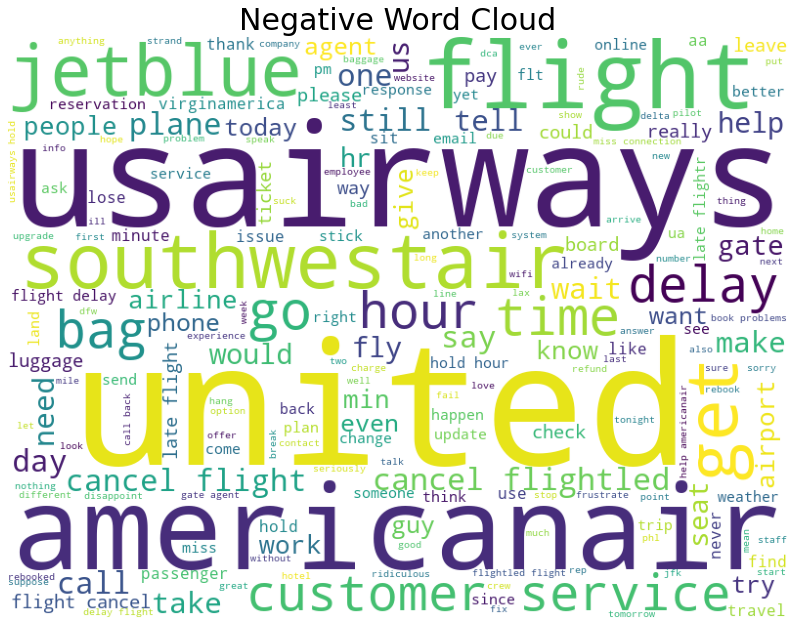

In [ ]:
text = ' '.join(twitter_df[twitter_df.airline_sentiment == 'negative']['text'].astype(str).to_list())       
show_wordcloud(text,'Negative Word Cloud')

### Negative word cloud observations
* United and US Airways top the negative comments list respectively
* Virgin America has the least negative comments
* Flight delays and cancellations are a frequently occuring issue
* Poor customer service is equally a major issue with flyers
* The word flight occurs frequently but it's not possible to tell if it has nuetral, negative or positive connotation

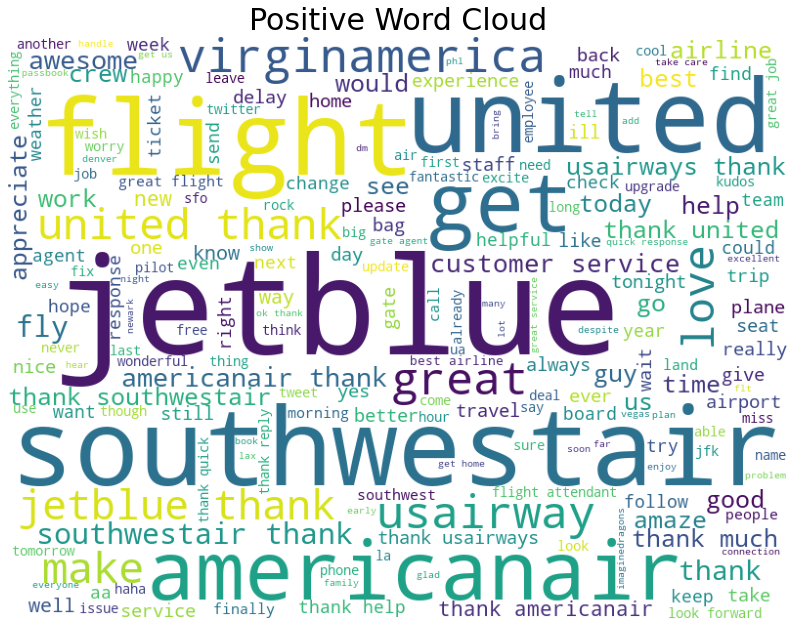

In [ ]:
text = ' '.join(twitter_df[twitter_df.airline_sentiment == 'positive']['text'].astype(str).to_list())       
show_wordcloud(text,'Positive Word Cloud')

### Positive word cloud observations
JetBlue airline has the most positive comments, however they are not under consideration in this study. Apparently, they have a publication called JetBlue News that makes tweets that are are either nuetral or positive. The airline column of these tweets are not JetBlue. Actually, they are mostly Delta, which is a competitor to JetBlue.
* Southwest airlines and United have the most positive comments
* The tweets consist of positive comments and expressions of gratitude without specifically citing the reasons
*  Customer service stands out for a reason for customer satisfaction -- words like service, help, work etc indicate this.
* The word flight also frequently occurs in tweets classified as positive but it's not possible to tell why by the word cloud

## Vectorization ahead of modeling
* instances of both CountVectorizer and TfidfVectorizer are created and will be tested

In [ ]:
from pandas.core.arrays.numeric import T
# bigrams are included in order to get the context of the use of words such as flight, service, 
# and acceptible, that occur frequently -- refer to the word clouds generated earlier
# the number of features is being limited to 5000 for a start because the addition of bigrams causes
# a ten-fold increase in the number of features 

cv = CountVectorizer(ngram_range=(1,2), max_features=5000)
tv = TfidfVectorizer(ngram_range=(1,2), max_features=5000)

In [ ]:
X = cv.fit_transform(twitter_df.text)
print(cv.vocabulary_)
print(X.shape)
print(type(X))
print(X.toarray())

{'virginamerica': 4693, 'what': 4833, 'say': 3533, 'plus': 3215, 'you': 4963, 'have': 1872, 'add': 32, 'commercials': 814, 'experience': 1274, 'you have': 4974, 'do': 1100, 'not': 2779, 'today': 4219, 'must': 2684, 'mean': 2570, 'need': 2702, 'take': 4011, 'another': 239, 'trip': 4276, 'virginamerica do': 4696, 'do not': 1108, 'take another': 4012, 'really': 3354, 'blast': 559, 'entertainment': 1201, 'face': 1294, 'little': 2442, 'recourse': 3386, 'virginamerica really': 4706, 'big': 544, 'bad': 400, 'thing': 4149, 'seriously': 3616, 'would': 4912, 'pay': 3079, 'flight': 1375, 'seat': 3564, 'play': 3183, 'fly': 1568, 'va': 4670, 'would pay': 4932, 'flight seat': 1489, 'seat do': 3568, 'not play': 2881, 'really bad': 3356, 'yes': 4954, 'nearly': 2701, 'every': 1238, 'time': 4190, 'vx': 4720, 'will': 4862, 'go': 1779, 'away': 373, 'every time': 1242, 'time fly': 4198, 'will not': 4864, 'not go': 2836, 'miss': 2639, 'opportunity': 3016, 'without': 4880, 'hat': 1870, 'well': 4828, 'now': 2

In [ ]:
Xt = tv.fit_transform(twitter_df.text)
print(tv.vocabulary_)
print(Xt.shape)
print(type(Xt))
print(Xt.toarray())

{'virginamerica': 4693, 'what': 4833, 'say': 3533, 'plus': 3215, 'you': 4963, 'have': 1872, 'add': 32, 'commercials': 814, 'experience': 1274, 'you have': 4974, 'do': 1100, 'not': 2779, 'today': 4219, 'must': 2684, 'mean': 2570, 'need': 2702, 'take': 4011, 'another': 239, 'trip': 4276, 'virginamerica do': 4696, 'do not': 1108, 'take another': 4012, 'really': 3354, 'blast': 559, 'entertainment': 1201, 'face': 1294, 'little': 2442, 'recourse': 3386, 'virginamerica really': 4706, 'big': 544, 'bad': 400, 'thing': 4149, 'seriously': 3616, 'would': 4912, 'pay': 3079, 'flight': 1375, 'seat': 3564, 'play': 3183, 'fly': 1568, 'va': 4670, 'would pay': 4932, 'flight seat': 1489, 'seat do': 3568, 'not play': 2881, 'really bad': 3356, 'yes': 4954, 'nearly': 2701, 'every': 1238, 'time': 4190, 'vx': 4720, 'will': 4862, 'go': 1779, 'away': 373, 'every time': 1242, 'time fly': 4198, 'will not': 4864, 'not go': 2836, 'miss': 2639, 'opportunity': 3016, 'without': 4880, 'hat': 1870, 'well': 4828, 'now': 2

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
# instantiate the encoder class
lblenc = LabelEncoder()

In [ ]:
# encode the airline_sentiment values to numerics suitable for machine learning algorithms
# a label encoder is used
twitter_df['encoded_sentiment'] = lblenc.fit_transform(twitter_df.airline_sentiment)

In [ ]:
twitter_df.head()

,airline_sentiment,text,encoded_sentiment
0,neutral,virginamerica what dhepburn say,1
1,positive,virginamerica plus you have add commercials ex...,2
2,neutral,virginamerica i do not today must mean i need ...,1
3,negative,virginamerica really aggressive blast obnoxiou...,0
4,negative,virginamerica really big bad thing,0


In [ ]:
# the airline_sentiment is the label class
labels = twitter_df.encoded_sentiment

### Split data vectorized using CountVectorizer into training and testing set

In [ ]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.toarray(), labels, test_size=0.3, stratify=labels, random_state=42)

In [ ]:
# use Random Forest to build model for the classification of tweets.
# calculate the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# instantiate the classifier
forest = RandomForestClassifier(n_estimators=10, random_state=42)
# train the model using the training set
forest = forest.fit(X_train, y_train)

print(forest)

# evaluate the model using cross validation
print(np.mean(cross_val_score(forest, X.toarray(), labels, cv=10)))

RandomForestClassifier(n_estimators=10, random_state=42)
0.7200819672131147


### Optimizing the parameter: Number of trees in the random forest model(n_estimators)

In [ ]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]

In [ ]:
# K-Fold Cross - validation .
# try a set of estimators to see the optimal number in the ensemble classifier
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b, random_state=42)
    # obtain the accuracy of each estimator using cross validation
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    # save the mean score for each estimator
    cv_scores.append(scores.mean())

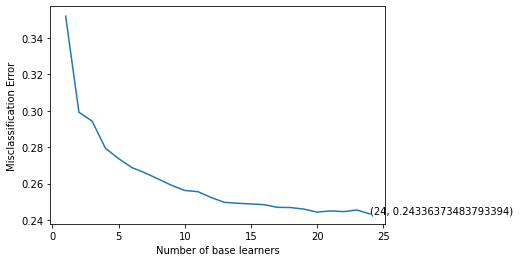

In [ ]:
# plotting the error as k increases
# compute error corresponding to each estimator
# by subtracting the accuracy score from 1
error = [1 - x for x in cv_scores]       
# find the lowest estimator error value                         
optimal_learners = base_ln[error.index(min(error))]    
# plot error as a function of the number of estimators - misclassification error             
plt.plot(base_ln, error)                                           
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# train the best model and calculate accuracy on test data 
rf_model_cv = RandomForestClassifier(n_estimators = optimal_learners, random_state=42)
rf_model_cv.fit(X_train, y_train)
rf_model_cv.score(X_test, y_test)

0.7602459016393442

In [ ]:
# save the prediction on test data as a result
pred =  rf_model_cv.predict(X_test)                  

In [ ]:
y_test.shape

(4392,)

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    this function makes a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # code to generate text within each quadrant
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # code to generate summary statistics ands text for summary statistics
    if sum_stats:
        # accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        # if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            # metrics for binary confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # set figure parameters according to other arguments
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # plot the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

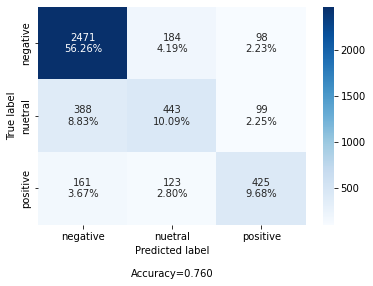

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# use sklearn to create a cinfusion matrix
conf_mat = confusion_matrix(y_test, pred)
lbls = ['True Negative','False Positive','False Negative','True Positive']
categories = ['negative',  'nuetral','positive']
# call the user defined function to render the confusion matrix
make_confusion_matrix(conf_mat, 
                      group_names=lbls,
                      categories=categories, 
                      cmap='Blues')

### Split data vectorized using TfIdfVectorizer into training and testing set


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xt.toarray(), labels, test_size=0.3, stratify=labels, random_state=42)

In [ ]:
# use Random Forest to build model for the classification of tweets.
# calculate the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(n_estimators=10, random_state=42)

rf_model_tfidf = model.fit(X_train, y_train)

print(rf_model_tfidf)

print(np.mean(cross_val_score(rf_model_tfidf, Xt.toarray(), labels, cv=10)))

RandomForestClassifier(n_estimators=10, random_state=42)
0.7099726775956284


## The performance of the CountVectorizer is better than the TfIdfVectorizer vectorizer

In [ ]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

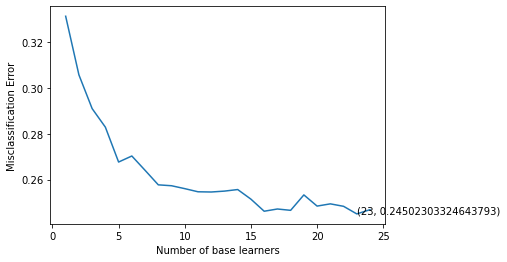

In [ ]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 
optimal_learners = base_ln[error.index(min(error))]                
plt.plot(base_ln, error)                                           
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# Training the best model and calculating accuracy on test data .
rf_model_tfidf = RandomForestClassifier(n_estimators = optimal_learners)
rf_model_tfidf.fit(X_train, y_train)
rf_model_tfidf.score(X_test, y_test)

0.7561475409836066

The performances of the best estimators using data vectorized by TfIdfVectorizer is correspondingly less than that of the CountVectorizer.

In [ ]:
pred =  rf_model_tfidf.predict(X_test)                  # save the prediction on test data as a result

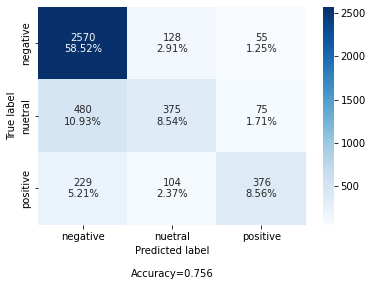

In [ ]:
conf_mat = confusion_matrix(y_test, pred)
lbls = ['True Negative','False Positive','False Negative','True Positive']
categories = ['negative',  'nuetral','positive']
make_confusion_matrix(conf_mat, 
                      group_names=lbls,
                      categories=categories, 
                      cmap='Blues')

In [ ]:
from sklearn.metrics import classification_report
target_names = ['negative', 'nuetral', 'positive']
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.78      0.93      0.85      2753
     nuetral       0.62      0.40      0.49       930
    positive       0.74      0.53      0.62       709

    accuracy                           0.76      4392
   macro avg       0.71      0.62      0.65      4392
weighted avg       0.74      0.76      0.74      4392



## Other ML and AI models will be explored (using TfIdf Vectorizer) to compare performances

In [ ]:
# load logistic regressor class
from sklearn.linear_model import LogisticRegression
# load sundry ensemble classifiers
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier

In [ ]:
model = LogisticRegression(random_state=49)

In [ ]:
lr_model_tfidf = model.fit(X_train, y_train)

In [ ]:
print(np.mean(cross_val_score(lr_model_tfidf, Xt.toarray(), labels, cv=10)))

0.7617486338797813


In [ ]:
lr_model_tfidf.score(X_test, y_test)

0.7957650273224044

In [ ]:
pred =  lr_model_tfidf.predict(X_test)                  

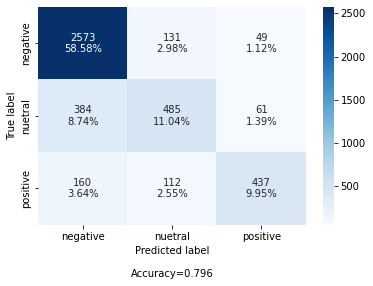

In [ ]:
lbls = ['True Negative','False Positive','False Negative','True Positive']
categories = ['negative',  'nuetral','positive']
conf_mat = confusion_matrix(y_test, pred)
make_confusion_matrix(conf_mat, 
                      group_names=lbls,
                      categories=categories, 
                      cmap='Blues')

In [ ]:
from sklearn.metrics import classification_report
target_names = ['negative', 'nuetral', 'positive']
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.83      0.93      0.88      2753
     nuetral       0.67      0.52      0.59       930
    positive       0.80      0.62      0.70       709

    accuracy                           0.80      4392
   macro avg       0.76      0.69      0.72      4392
weighted avg       0.79      0.80      0.79      4392



## The logistic regressor performed significantly better than random forest
* The cross-validated score was 0.76
* The test score was even higher at 0.79, approximately 0.8

## Finally we will classify the data using a Voting Classifier, which classifies by comparing one prediction at a time: hard voting takes the label with the highest number of predictions, while soft voting takes the label with the highest total probability.

In [ ]:
# importing libraries
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
    
# group / ensemble of models
estimator = []
estimator.append(('LR', 
                LogisticRegression(random_state=42)))
estimator.append(('RF', RandomForestClassifier(n_estimators=10, random_state=42)))
  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, y_train)
y_pred_h = vot_hard.predict(X_test)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred_h)
  
# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(X_train, y_train)
y_pred_s = vot_soft.predict(X_test)
  


In [ ]:
print(np.mean(cross_val_score(vot_hard, X.toarray(), labels, cv=10)))
print(classification_report(y_test, y_pred_h, target_names=target_names))

0.7363387978142076
              precision    recall  f1-score   support

    negative       0.76      0.97      0.85      2753
     nuetral       0.65      0.34      0.45       930
    positive       0.83      0.48      0.61       709

    accuracy                           0.76      4392
   macro avg       0.75      0.60      0.64      4392
weighted avg       0.75      0.76      0.73      4392



In [ ]:
print(np.mean(cross_val_score(vot_soft, X.toarray(), labels, cv=10)))
print(classification_report(y_test, y_pred_s, target_names=target_names))

0.7577868852459017
              precision    recall  f1-score   support

    negative       0.80      0.94      0.87      2753
     nuetral       0.66      0.45      0.54       930
    positive       0.76      0.58      0.66       709

    accuracy                           0.78      4392
   macro avg       0.74      0.66      0.69      4392
weighted avg       0.77      0.78      0.76      4392



## The Voting Classifier using soft voting performs better than hard voting 
* It has a weighted average f1-score of 0.76 while the hard voting has 0.73
* The hard voting has a higher recall on the negative class

##  outperforms every other model as far as negative sentiments are concerned with a recall of 0.94 and a f1-score of 0.87

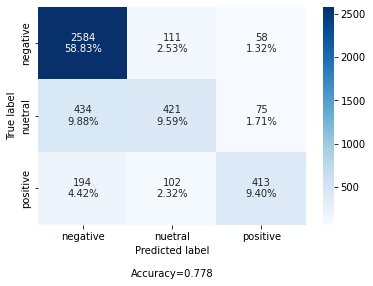

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred_s)
make_confusion_matrix(conf_mat, 
                      group_names=lbls,
                      categories=categories, 
                      cmap='Blues')

## Word Cloud of top 40 important features from LogisticRegressor model
* using CountVectorizer
* using TfIdfVectorizer

In [ ]:
def getTopFeatures(clf, vrizer, count):
  all_features = vrizer.get_feature_names() # instantiate the feature from the Count vectorizer
  top_features='' # add top 40 features into top_feature after training the model
  feat=clf.feature_importances_
  features=np.argsort(feat)[::-1]
  for i in features[0:count]:
      top_features+=all_features[i]
      top_features+=' '
  return top_features


In [ ]:
top40cv = getTopFeatures(rf_model_cv, cv, 40)

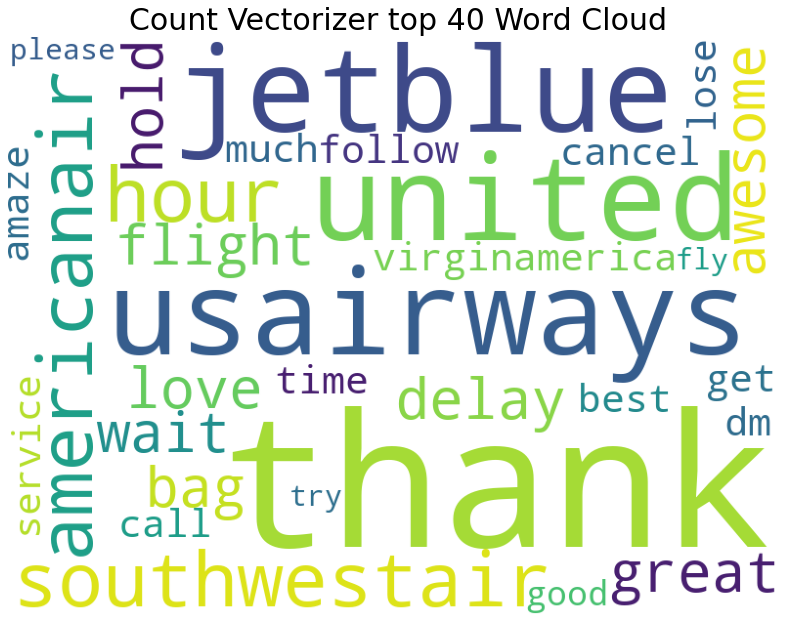

In [ ]:
show_wordcloud(top40cv,'Count Vectorizer top 40 Word Cloud')

In [ ]:
top40tv = getTopFeatures(rf_model_tfidf, tv, 40)

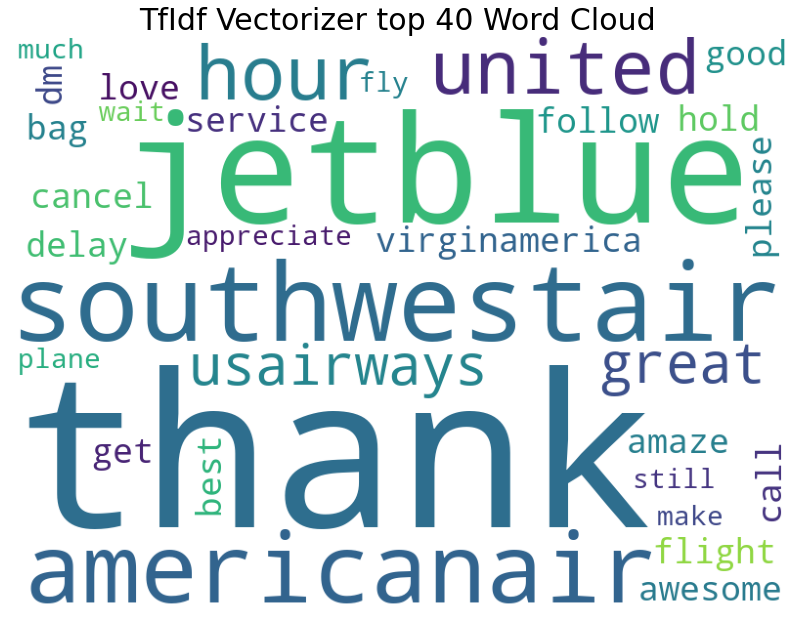

In [ ]:
show_wordcloud(top40tv,'TfIdf Vectorizer top 40 Word Cloud')

## Conclusion
Delta airline is conspicously missing from the word cloud because as was noted in the EDA almost all the tweets associated with them in the dataset were made by a user named JetBlue News. The only explanation would be that Delta purchased JetBlue, and even in that instance, tweets would be mostly expected from the public. Oddly, the airline_sentiment column for Delta still indicates, for instance, that they are notoriously late.

Various preprocessing like removal of stopwords reduced the advantage of TfIdfVectorization over CountVectorization because the stop words which are the most frequently occuring were removed.

The airlines are mostly concerned about negative tweets which express dissatisfaction with their brand. Moreover, they would like to know the aspects of their product or service that is causing such ill feelings.

Proper classification will help them adjust service delivery as well as pricing to pacify grievances.

* In this regard false negatives or false neutrals are not detrimental to the brand. The worst case scenario is where an airline unnecessarily expends resources to appease customers who were actually content.

* It is more critical for airlines to avoid false positives because they would be neglecting aggrieved customers.

* Therefore, Precision is more important than Recall because it aims to minimize false positives.

* All in all, the f1-score is a reasonable measure of performance because it is reflective of both precision and recall. The airline has to balance protecting its brand reputation and sustainable customer programs and services.

The soft voting classifier will be adopted even though the performance of the logistic regressor is more impressive. Voting classifiers have the advantage of reducing overfitting as well as increasing reliability.

The various airlines have their unique strengths and weaknesses and customer service accounts for the greatest dissatisfaction among flyers followed by late flights

* Delta Airlines is more likely to be late than others
* Virgin America Airline is thrice likely to default on booking than the other airlines
* Southwest Airlines and American are leading the pack when it comes to cancellations
* United Airlines appears to be poor in baggage handling and are the most likely to lose customers luggage

The imbalance in classes is less of a problem because there are three classes and the negative, which is the focus, is roughly the same percentage as the neutral and positive combined. Actually the neutral and positive classes could be combined into a single class so that the problem is turned into a binary classification problem. This will make it possible to optimize the threshold using ROC / AUC curves and get a better score. 

With more available time, it would be instructive to plot accuracy against
the number of features as well as the number of bigrams -- one and two.

Also, given enough time, it would be beneficial to experiment with and possibly include an Artificial Neural Network in the voter classification. This would be especially beneficial if it can be trained with a large amount of tweet data.

